<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M6_AI1_AlvaradoRuizJoseArmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*PADAWAN*: 


##JOSE ARMANDO ALVARADO RUIZ

# **Tema 1. Árboles de decisiónArchivo**

**Entrega: RECAUDACIÓN DE PELÍCULAS (IMDB)**


# **Descripción de la tarea**

###Contexto

IMDb (acrónimo de Internet Movie Database) es una base de datos on-line de información relacionada con películas, programas de televisión, videos caseros, videojuegos y contenido de transmisión en línea - incluidos los actores, el equipo de producción y biografías personales, resúmenes de tramas, trivia, calificaciones y reseñas de fans y críticas. Originalmente, fue un sitio web operado por fanáticos, la base de datos ahora es propiedad y está operada por IMDb.com, Inc., una subsidiaria de Amazon.

A diciembre de 2020, IMDb tenía, aproximadamente, 7,5 millones de títulos (incluidos episodios) y 10,4 millones de personalidades en su base de datos, así como 83 millones de usuarios registrados. 
El dataset original es mucho mayor, pero ha sido reducido para eliminar procesos de limpieza de datos.

Descripción de las variables: 

* Imdb_title_id: id único de cada película. 
* Original_title: título original de la película. 
* Year: año. 
* Genre: género. 
* Duration: duración en minutos. 
* Country: país. 
* Director: director. 
* Actors: actor principal. 
* Avg_votes: media de los votos de los usuarios. 
* Avg_vote_weighted: media ponderada de la media de los votos con su número. 
*Votes: número de votos de los usuarios. 
*Budget: presupuesto destinado a su producción. 
*Worldwide_gross_income: ingresos generados en todo el mundo. 
*Reviews_from_users: número de opiniones de usuarios. 
*Reviews_from_critics: número de opiniones de críticos. 

Se pide: 

Aplicar el algoritmo de ÁRBOLES de DECISIÓN para la estimación de la recaudación de una película, dadas las variables: genre, duration, country, director, actors y Budget. 

Aplicar el algoritmo de ÁRBOLES de DECISIÓN para la estimación de la media ponderada de los votos en IMDB (avg_vote_weighted) atendiendo a las variables: genre, duration, country, director, actors, budget, worldwide_gross_income, reviews_from_users y reviews_from_critics.


### **Importación librerias**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree

%matplotlib inline

# Carga de Datos y visualización general

In [54]:
file_name = '/content/data/act2_IMDb movies_ml.csv'
df = pd.read_csv(file_name, sep=';', decimal=',')

Visualización de los primeros 10 registros del dataset.

---




In [55]:
df.head(10)

,imdb_title_id,original_title,year,genre,duration,country,director,actors,avg_vote,votes,avg_vote_weighted,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
0,tt0010323,Das Cabinet des Dr. Caligari,1920,"Fantasy, Horror, Mystery",76,Germany,Robert Wiene,Werner Krauss,8.1,55601,7.99,$ 18000,$ 8811,237,160
1,tt0012190,The Four Horsemen of the Apocalypse,1921,"Drama, Romance, War",150,USA,Rex Ingram,Pomeroy Cannon,7.2,3058,6.61,$ 800000,$ 9183673,45,16
2,tt0014624,A Woman of Paris: A Drama of Fate,1923,"Drama, Romance",82,USA,Charles Chaplin,Edna Purviance,7,4735,6.61,$ 351000,$ 11233,37,24
3,tt0015864,The Gold Rush,1925,"Adventure, Comedy, Drama",95,USA,Charles Chaplin,Charles Chaplin,8.2,97480,8.13,$ 923000,$ 26916,190,125
4,tt0018455,Sunrise: A Song of Two Humans,1927,"Drama, Romance",94,USA,F.W. Murnau,George O'Brien,8.1,46069,7.97,$ 200000,$ 121107,250,186
5,tt0018578,Wings,1927,"Drama, Romance, War",144,USA,William A. Wellman,Clara Bow,7.5,11139,7.18,$ 2000000,$ 746,95,92
6,tt0021106,Madam Satan,1930,"Comedy, Drama, Musical",116,USA,Cecil B. DeMille,Kay Johnson,6.5,838,6.11,$ 980000,$ 1005,43,19
7,tt0021749,City Lights,1931,"Comedy, Drama, Romance",87,USA,Charles Chaplin,Virginia Cherrill,8.5,162668,8.45,$ 1500000,$ 46008,295,122
8,tt0021814,Dracula,1931,"Drama, Fantasy, Horror",75,USA,Tod Browning,Bela Lugosi,7.5,45054,7.41,$ 355000,$ 85204,556,163
9,tt0022835,Dr. Jekyll and Mr. Hyde,1931,"Horror, Sci-Fi",98,USA,Rouben Mamoulian,Fredric March,7.6,12225,7.28,$ 535000,$ 16615,127,62


In [56]:
# Estructura dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8664 entries, 0 to 8663
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   imdb_title_id          8664 non-null   object
 1   original_title         8664 non-null   object
 2   year                   8664 non-null   int64 
 3   genre                  8664 non-null   object
 4   duration               8664 non-null   int64 
 5   country                8664 non-null   object
 6   director               8664 non-null   object
 7   actors                 8664 non-null   object
 8   avg_vote               8664 non-null   object
 9   votes                  8664 non-null   int64 
 10  avg_vote_weighted      8664 non-null   object
 11  budget                 8664 non-null   object
 12  worlwide_gross_income  8664 non-null   object
 13  reviews_from_users     8664 non-null   int64 
 14  reviews_from_critics   8664 non-null   int64 
dtypes: int64(5), object(1

In [57]:
# Analisis global de datos estadisticos de la muestra de variables cuantitativas
df.describe()

,year,duration,votes,reviews_from_users,reviews_from_critics
count,8664.000000,8664.000000,8.664000e+03,8664.000000,8664.000000
mean,2002.270891,106.668629,7.464144e+04,251.428440,114.249885
std,13.389456,18.541422,1.502981e+05,454.674936,121.558603
min,1920.000000,75.000000,1.000000e+02,1.000000,1.000000
25%,1996.000000,94.000000,4.199250e+03,38.000000,27.000000
50%,2005.000000,103.000000,2.104800e+04,117.000000,73.000000
75%,2012.000000,116.000000,7.749050e+04,284.000000,161.000000
max,2020.000000,271.000000,2.278845e+06,10472.000000,999.000000


El dataset consta de **8664 registros** con **15 variables**.

## **Consideraciones:**

Se deben realizar dos tipos de preprocesado: 

* Convertir todas las variables categóricas en numéricas. 
* Tanto “budget” como “worldwide_gross_income” están en formato string. Hay que eliminar el símbolo de dólar para convertir a entero. 

Con todos estos datos se pide lo siguiente: 

# Preprocesado de conversión de tipos de datos (comentado arriba).

In [58]:
encoder_actors = LabelEncoder()
encoder_directors = LabelEncoder()
encoder_genres = LabelEncoder()
encoder_countries = LabelEncoder()

df["actors"] = encoder_actors.fit_transform(df["actors"].values)
df["director"] = encoder_actors.fit_transform(df["director"].values)
df["genre"] = encoder_actors.fit_transform(df["genre"].values)
df["country"] = encoder_actors.fit_transform(df["country"].values)

In [59]:
df[["actors","director","genre","country"]].head(10)

,actors,director,genre,country
0,3869,3282,407,281
1,3040,3145,377,807
2,1058,561,372,807
3,624,561,94,807
4,1301,1146,372,807
5,731,3955,377,807
6,2081,550,222,807
7,3838,561,224,807
8,378,3765,330,807
9,1249,3338,431,807


In [60]:
# Conversion de variables “budget” como “worldwide_gross_income”

# Elimino simbolo $ mediante expresion regular y replace. Se convierte columna en int:
df.budget = df.budget.str.replace(r"^[$\s]+", '',regex=True).astype(int)
df.worlwide_gross_income = df.worlwide_gross_income.str.replace(r"^[$\s]+", '',regex=True).astype(int)

In [61]:
# Convierto variables object a numeric (float)
df.avg_vote_weighted = df.avg_vote_weighted.astype(float)
df.avg_vote = df.avg_vote.astype(float)

In [62]:
# Estructura de dataframe luego de preprocesado.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8664 entries, 0 to 8663
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          8664 non-null   object 
 1   original_title         8664 non-null   object 
 2   year                   8664 non-null   int64  
 3   genre                  8664 non-null   int64  
 4   duration               8664 non-null   int64  
 5   country                8664 non-null   int64  
 6   director               8664 non-null   int64  
 7   actors                 8664 non-null   int64  
 8   avg_vote               8664 non-null   float64
 9   votes                  8664 non-null   int64  
 10  avg_vote_weighted      8664 non-null   float64
 11  budget                 8664 non-null   int64  
 12  worlwide_gross_income  8664 non-null   int64  
 13  reviews_from_users     8664 non-null   int64  
 14  reviews_from_critics   8664 non-null   int64  
dtypes: f

In [63]:
# Primeros 1o registros del Dataframe luego de la transformación de las variables:
df.head(10)

,imdb_title_id,original_title,year,genre,duration,country,director,actors,avg_vote,votes,avg_vote_weighted,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
0,tt0010323,Das Cabinet des Dr. Caligari,1920,407,76,281,3282,3869,8.1,55601,7.99,18000,8811,237,160
1,tt0012190,The Four Horsemen of the Apocalypse,1921,377,150,807,3145,3040,7.2,3058,6.61,800000,9183673,45,16
2,tt0014624,A Woman of Paris: A Drama of Fate,1923,372,82,807,561,1058,7.0,4735,6.61,351000,11233,37,24
3,tt0015864,The Gold Rush,1925,94,95,807,561,624,8.2,97480,8.13,923000,26916,190,125
4,tt0018455,Sunrise: A Song of Two Humans,1927,372,94,807,1146,1301,8.1,46069,7.97,200000,121107,250,186
5,tt0018578,Wings,1927,377,144,807,3955,731,7.5,11139,7.18,2000000,746,95,92
6,tt0021106,Madam Satan,1930,222,116,807,550,2081,6.5,838,6.11,980000,1005,43,19
7,tt0021749,City Lights,1931,224,87,807,561,3838,8.5,162668,8.45,1500000,46008,295,122
8,tt0021814,Dracula,1931,330,75,807,3765,378,7.5,45054,7.41,355000,85204,556,163
9,tt0022835,Dr. Jekyll and Mr. Hyde,1931,431,98,807,3338,1249,7.6,12225,7.28,535000,16615,127,62


# Generación de los dos modelos que se piden. 


###ÁRBOLES de DECISIÓN para la estimación de la recaudación de una película

In [84]:
# Aplicar el algoritmo de ÁRBOLES de DECISIÓN para la estimación de la recaudación de una película, 
#dadas las variables: genre, duration, country, director, actors y Budget.

# Generamos un nuevo dataset con las variables de nuestro interes, se utilizan las variables numericas:
df_recaudacion = df[["genre","duration","country","director","actors","budget","worlwide_gross_income"]]
df_recaudacion.head(5)

,genre,duration,country,director,actors,budget,worlwide_gross_income
0,407,76,281,3282,3869,18000,8811
1,377,150,807,3145,3040,800000,9183673
2,372,82,807,561,1058,351000,11233
3,94,95,807,561,624,923000,26916
4,372,94,807,1146,1301,200000,121107


In [65]:
# Separamos el dataframe en variables predictoras (X) y variable respuesta (y)
X = df_recaudacion.iloc[:,0:-1]
y = df_recaudacion.iloc[:,-1]

In [66]:
# Separamos los datos en entrenamientos (train) y test: Asignamos 30% para test
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    random_state=33, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(6064, 6) (6064,)
(2600, 6) (2600,)


In [67]:
# Generamos listas para realizar analisis del modelo
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []


for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeRegressor(random_state=33, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  pred_train = tree_model.predict(X_train)
  pred_test = tree_model.predict(X_test)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))
  mse_train_list.append(mean_squared_error(y_train, pred_train))
  mse_test_list.append(mean_squared_error(y_test, pred_test))

df_model1 = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })

In [68]:
df_model1.set_index("max_depth", inplace=True)

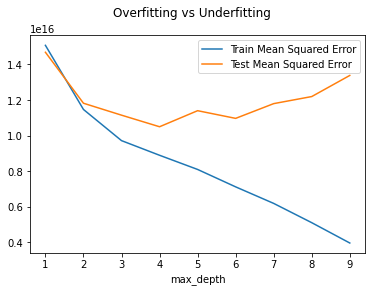

In [69]:
df_model1["mse_train"].plot(label="Train Mean Squared Error")
df_model1["mse_test"].plot(label="Test Mean Squared Error")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

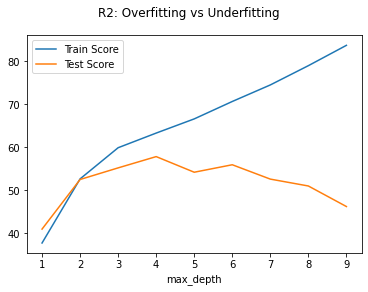

In [70]:
df_model1["score_train"].plot(label="Train Score")
df_model1["score_test"].plot(label="Test Score")
plt.suptitle("R2: Overfitting vs Underfitting")
plt.legend()
plt.show();

In [71]:
### Entrenamiento y evaluación del modelo con el max_depth seleccionado:
tree_model1 = DecisionTreeRegressor(random_state=33, max_depth=4)
tree_model1.fit(X_train, y_train)
pred_train = tree_model1.predict(X_train)
print (r2_score(y_train, pred_train))

0.6327448741500591


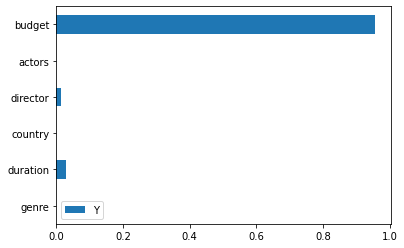

In [72]:
### Cálculo de la Importancia de las Variables
df_imp = pd.DataFrame(tree_model1.feature_importances_.reshape(1,-1), columns=X.columns, index=["Y"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

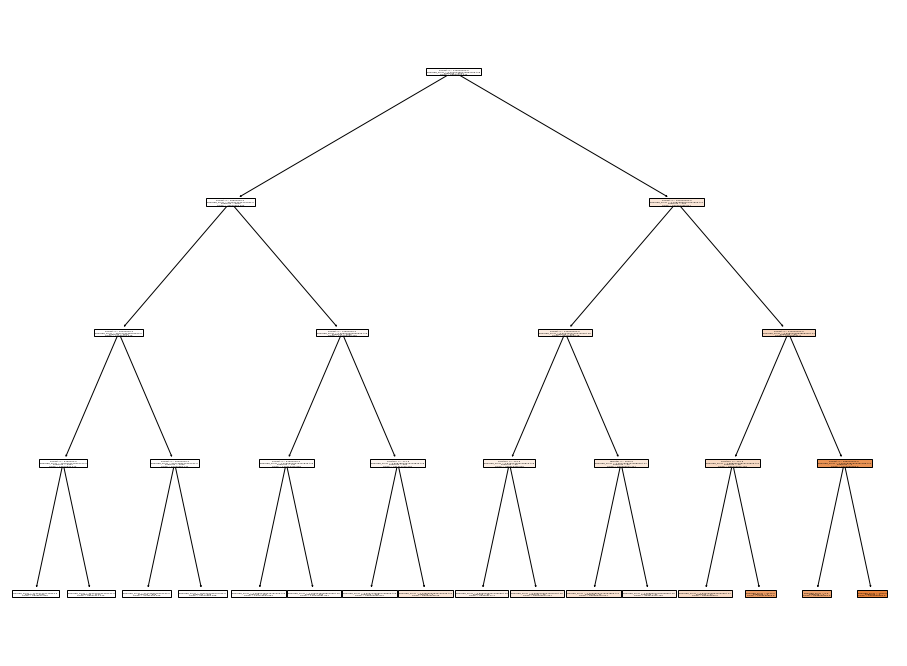

In [73]:
### Generación del Grafo para su análisis

plt.figure(figsize=(16,12))
plot_tree(tree_model1, filled=True, max_depth=4, feature_names=X.columns, class_names=["Y"])
plt.show()

#### ÁRBOLES de DECISIÓN para la estimación de la media ponderada de los votos en IMDB (avg_vote_weighted)

In [74]:
#Aplicar el algoritmo de ÁRBOLES de DECISIÓN para la estimación de la media ponderada de los votos en IMDB 
#(avg_vote_weighted) atendiendo a las variables: genre, duration, country, director, actors, budget, 
#worldwide_gross_income, reviews_from_users y reviews_from_critics.

# Generamos un nuevo dataset con las variables de nuestro interes, se utilizan las variables numericas:
df_estimacion = df[["genre","duration","country","director","actors","budget","worlwide_gross_income",
                    "reviews_from_users","reviews_from_critics","avg_vote_weighted"]]
df_estimacion.head(5)

,genre,duration,country,director,actors,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,avg_vote_weighted
0,407,76,281,3282,3869,18000,8811,237,160,7.99
1,377,150,807,3145,3040,800000,9183673,45,16,6.61
2,372,82,807,561,1058,351000,11233,37,24,6.61
3,94,95,807,561,624,923000,26916,190,125,8.13
4,372,94,807,1146,1301,200000,121107,250,186,7.97


In [75]:
# Separamos el dataframe en variables predictoras (X) y variable respuesta (y)
X = df_estimacion.iloc[:,0:-1]
y = df_estimacion.iloc[:,-1]

In [76]:
# Separamos los datos en entrenamientos (train) y test: Asignamos 30% para test
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    random_state=33, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(6064, 9) (6064,)
(2600, 9) (2600,)


In [77]:
# Generamos listas para realizar analisis del modelo
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []


for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeRegressor(random_state=33, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  pred_train = tree_model.predict(X_train)
  pred_test = tree_model.predict(X_test)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))
  mse_train_list.append(mean_squared_error(y_train, pred_train))
  mse_test_list.append(mean_squared_error(y_test, pred_test))

df_model2 = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })

In [78]:
df_model2.set_index("max_depth", inplace=True)

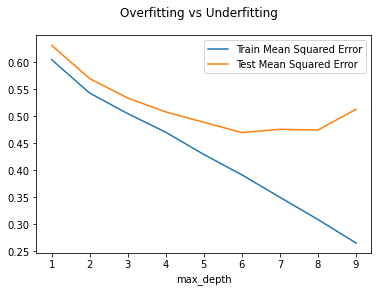

In [79]:
df_model2["mse_train"].plot(label="Train Mean Squared Error")
df_model2["mse_test"].plot(label="Test Mean Squared Error")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

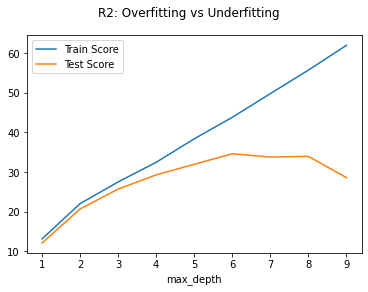

In [80]:
df_model2["score_train"].plot(label="Train Score")
df_model2["score_test"].plot(label="Test Score")
plt.suptitle("R2: Overfitting vs Underfitting")
plt.legend()
plt.show();

In [85]:
### Entrenamiento y evaluación del modelo con el max_depth seleccionado:
tree_model2 = DecisionTreeRegressor(random_state=33, max_depth=8)
tree_model2.fit(X_train, y_train)
pred_train = tree_model2.predict(X_train)
print ("R2:", r2_score(y_train, pred_train))

R2: 0.5568599997393386


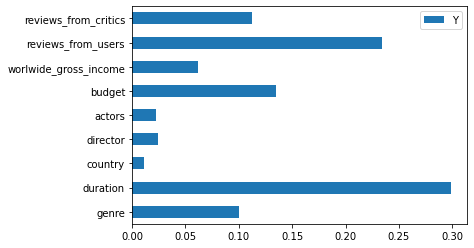

In [82]:
### Cálculo de la Importancia de las Variables
df_imp = pd.DataFrame(tree_model2.feature_importances_.reshape(1,-1), columns=X.columns, index=["Y"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

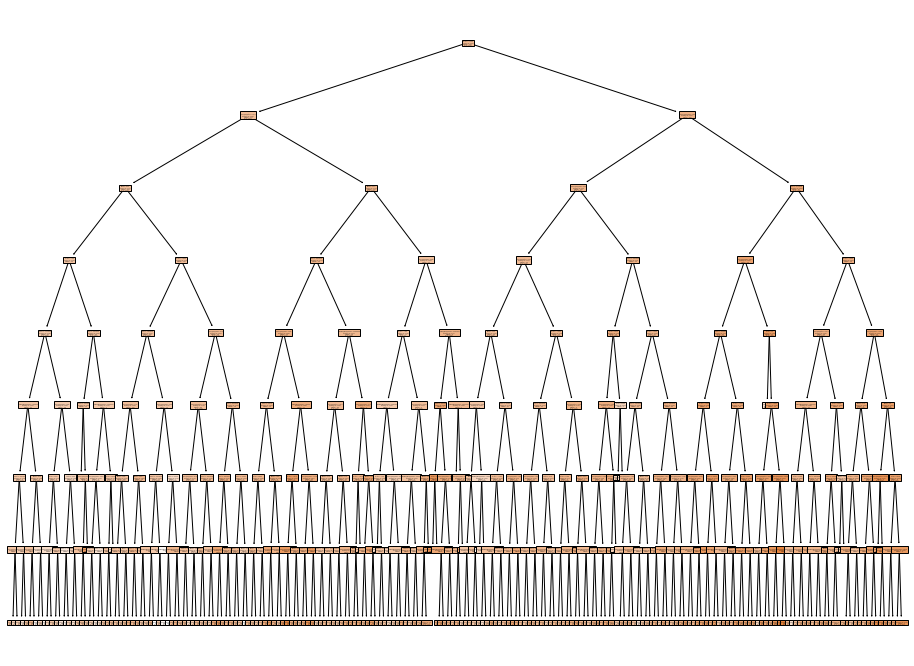

In [83]:
### Generación del Grafo para su análisis

plt.figure(figsize=(16,12))
plot_tree(tree_model2, filled=True, max_depth=8, feature_names=X.columns, class_names=["Y"])
plt.show()

# Comentarios sobre la elección de los parámetros de los modelos finales. 


# Estimación del presupuesto de dos películas con los valores que queráis; eligiendo país, género, director, etc., a vuestro gusto. 


# Estimación del rating de dos películas con los valores que queráis; eligiendo país, género, director, etc., a vuestro gusto. 